In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:\\Users\\anime\\Downloads\\Econometrics_Data\\MRW1992\\MRW1992.xlsx")

In [3]:
df['log_Y85'] = np.log(df['Y85'])
df['log_Y60'] = np.log(df['Y60'])
df['log_s'] = np.log(df['invest'] / 100)
df['log_ngd'] = np.log(df['pop_growth'] / 100 + 0.05)
df['log_school'] = np.log(df['school'] / 100)


df['diff_s_ngd'] = df['log_s'] - df['log_ngd']
df['diff_school_ngd'] = df['log_school'] - df['log_ngd']
df['log_diff'] = df['log_Y85'] - df['log_Y60']


df = sm.add_constant(df)


print(df.head())

   const       country  N  I  O     Y60     Y85  Y_growth  pop_growth  invest  \
0    1.0       Algeria  1  1  0  2485.0  4371.0       4.8         2.6    24.1   
1    1.0        Angola  1  0  0  1588.0  1171.0       0.8         2.1     5.8   
2    1.0         Benin  1  0  0  1116.0  1071.0       2.2         2.4    10.8   
3    1.0      Botswana  1  1  0   959.0  3671.0       8.6         3.2    28.3   
4    1.0  Burkina Faso  1  0  0   529.0   857.0       2.9         0.9    12.7   

   school   log_Y85   log_Y60     log_s   log_ngd  log_school  diff_s_ngd  \
0     4.5  8.382747  7.818028 -1.422958 -2.577022   -3.101093    1.154064   
1     1.8  7.065613  7.370231 -2.847312 -2.645075   -4.017384   -0.202237   
2     1.8  6.976348  7.017506 -2.225624 -2.603690   -4.017384    0.378066   
3     2.9  8.208219  6.865891 -1.262308 -2.501036   -3.540459    1.238728   
4     0.4  6.753438  6.270988 -2.063568 -2.830218   -5.521461    0.766650   

   diff_school_ngd  log_diff  
0        -0.524071 

In [6]:


df1 = df[df['N'] == 1]
df2 = df[df['I'] == 1]
df3 = df[df['O'] == 1]

# Unrestricted model

models1a = {}
models1a['Model 1'] = ols('log_Y85 ~ log_s + log_ngd', data=df1).fit()
models1a['Model 2'] = ols('log_Y85 ~ log_s + log_ngd', data=df2).fit()
models1a['Model 3'] = ols('log_Y85 ~ log_s + log_ngd', data=df3).fit()

# Restricted model

models1b = {}
models1b['Model 1'] = ols('log_Y85 ~ diff_s_ngd', data=df1).fit()
models1b['Model 2'] = ols('log_Y85 ~ diff_s_ngd', data=df2).fit()
models1b['Model 3'] = ols('log_Y85 ~ diff_s_ngd', data=df3).fit()

In [7]:
results_table1a = summary_col(
    [models1a['Model 1'], models1a['Model 2'], models1a['Model 3']],
    stars=True,
    model_names=['Non-Oil', 'Intermediate', 'OECD'],
    info_dict={
        'Number of observations': lambda x: f"{int(x.nobs)}",
        'Residual Standard Error': lambda x: f"{np.sqrt(x.mse_resid):.4f}"
    }
)

results_table1b = summary_col(
    [models1b['Model 1'], models1b['Model 2'], models1b['Model 3']],
    stars=True,
    model_names=['Non-Oil', 'Intermediate', 'OECD'],
    info_dict={
        'Number of observations': lambda x: f"{int(x.nobs)}",
        'Residual Standard Error': lambda x: f"{np.sqrt(x.mse_resid):.4f}",
        'Implied α': lambda x: f"{x.params['diff_s_ngd']/(1 + x.params['diff_s_ngd']):.2f}"
    }
)

# Print the results table
print("Table 1a: Textbook Solow Model")
print(results_table1a)

print("\n" + "="*80 + "\n")

print("Table 1b: Restricted Model")
print(results_table1b)

Table 1a: Textbook Solow Model

                         Non-Oil   Intermediate    OECD  
---------------------------------------------------------
Intercept               5.4299***  5.3459***    8.0206***
                        (1.5839)   (1.5431)     (2.5179) 
log_s                   1.4240***  1.3176***    0.4999   
                        (0.1431)   (0.1709)     (0.4339) 
log_ngd                 -1.9898*** -2.0172***   -0.7419  
                        (0.5634)   (0.5339)     (0.8522) 
R-squared               0.6009     0.5989       0.1059   
R-squared Adj.          0.5925     0.5878       0.0118   
Number of observations  98         75           22       
Residual Standard Error 0.6891     0.6106       0.3774   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


Table 1b: Restricted Model

                         Non-Oil  Intermediate    OECD  
--------------------------------------------------------
Intercept               6.8724*** 7.0929***    8.6244***
            

In [14]:
# Augmented Solow Model

# Unrestricted model

models2a = {}
models2a['Model 1'] = ols('log_Y85 ~ log_s + log_ngd + log_school', data=df1).fit()
models2a['Model 2'] = ols('log_Y85 ~ log_s + log_ngd + log_school', data=df2).fit()
models2a['Model 3'] = ols('log_Y85 ~ log_s + log_ngd + log_school', data=df3).fit()

# Restricted model

models2b = {}
models2b['Model 1'] = ols('log_Y85 ~ diff_s_ngd + diff_school_ngd', data=df1).fit()
models2b['Model 2'] = ols('log_Y85 ~ diff_s_ngd + diff_school_ngd', data=df2).fit()
models2b['Model 3'] = ols('log_Y85 ~ diff_s_ngd + diff_school_ngd', data=df3).fit()

In [17]:
results_table2a = summary_col(
    [models2a['Model 1'], models2a['Model 2'], models2a['Model 3']],
    stars=True,
    model_names=['Non-Oil', 'Intermediate', 'OECD'],
    info_dict={
        'Number of observations': lambda x: f"{int(x.nobs)}",
        'Residual Standard Error': lambda x: f"{np.sqrt(x.mse_resid):.4f}"
    }
)

results_table2b = summary_col(
    [models2b['Model 1'], models2b['Model 2'], models2b['Model 3']],
    stars=True,
    model_names=['Non-Oil', 'Intermediate', 'OECD'],
    info_dict={
        'Number of observations': lambda x: f"{int(x.nobs)}",
        'Residual Standard Error': lambda x: f"{np.sqrt(x.mse_resid):.4f}",
        'Implied α': lambda x: f"{x.params['diff_s_ngd'] / (1 + x.params['diff_s_ngd'] + x.params['diff_school_ngd']):.2f}",
        'Implied β': lambda x: f"{x.params['diff_school_ngd'] / (1 + x.params['diff_s_ngd'] + x.params['diff_school_ngd']):.2f}"
    }
)

# Print the results table
print("Table 2a: Augmented Solow Model")
print(results_table2a)

print("\n" + "="*80 + "\n")

print("Table 2b: Restricted Model")
print(results_table2b)

Table 2a: Augmented Solow Model

                         Non-Oil   Intermediate    OECD  
---------------------------------------------------------
Intercept               6.8444***  7.7913***    8.6369***
                        (1.1774)   (1.1924)     (2.2143) 
log_s                   0.6967***  0.7004***    0.2761   
                        (0.1328)   (0.1506)     (0.3889) 
log_ngd                 -1.7452*** -1.4998***   -1.0755  
                        (0.4159)   (0.4032)     (0.7560) 
log_school              0.6545***  0.7305***    0.7676** 
                        (0.0727)   (0.0952)     (0.2933) 
R-squared               0.7856     0.7807       0.3524   
R-squared Adj.          0.7788     0.7714       0.2444   
Number of observations  98         75           22       
Residual Standard Error 0.5077     0.4547       0.3300   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


Table 2b: Restricted Model

                         Non-Oil  Intermediate    OECD  
---------

In [18]:
# Unconditional Convergence

models3 = {}
models3['Model 1'] = ols('log_diff ~ log_Y60', data=df1).fit()
models3['Model 2'] = ols('log_diff ~ log_Y60', data=df2).fit()
models3['Model 3'] = ols('log_diff ~ log_Y60', data=df3).fit()

In [24]:
results_table3 = summary_col(
    [models3['Model 1'], models3['Model 2'], models3['Model 3']],
    stars=True,
    model_names=['Non-Oil', 'Intermediate', 'OECD'],
    info_dict={
        'Number of observations': lambda x: f"{int(x.nobs)}",
        'Residual Standard Error': lambda x: f"{np.sqrt(x.mse_resid):.4f}",
        'Implied λ': lambda x: f"{-np.log(x.params['log_Y60']+1) / (1985-1960): .5f}"
    }
)

print("Table 3: Tests for Unconditional Convergence")
print(results_table3)

Table 3: Tests for Unconditional Convergence

                        Non-Oil  Intermediate    OECD   
--------------------------------------------------------
Intercept               -0.2666  0.5875       3.6863*** 
                        (0.3796) (0.4329)     (0.6849)  
log_Y60                 0.0943*  -0.0042      -0.3411***
                        (0.0496) (0.0548)     (0.0785)  
R-squared               0.0363   0.0001       0.4855    
R-squared Adj.          0.0262   -0.0136      0.4597    
Number of observations  98       75           22        
Residual Standard Error 0.4405   0.4077       0.1830    
Implied λ               -0.00360 0.00017      0.01669   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [25]:
# Table 3: Conditional Convergence

models4 = {}
models4['Model 1'] = ols('log_diff ~ log_Y60 + log_s + log_ngd', data=df1).fit()
models4['Model 2'] = ols('log_diff ~ log_Y60 + log_s + log_ngd', data=df2).fit()
models4['Model 3'] = ols('log_diff ~ log_Y60 + log_s + log_ngd', data=df3).fit()

In [26]:
results_table4 = summary_col(
    [models4['Model 1'], models4['Model 2'], models4['Model 3']],
    stars=True,
    model_names=['Non-Oil', 'Intermediate', 'OECD'],
    info_dict={
        'Number of observations': lambda x: f"{int(x.nobs)}",
        'Residual Standard Error': lambda x: f"{np.sqrt(x.mse_resid):.4f}",
        'Implied λ': lambda x: f"{-np.log(x.params['log_Y60']+1) / (1985-1960): .5f}"
    }
)

print("Table 4: Tests for Conditional Convergence")
print(results_table4)

Table 4: Tests for Conditional Convergence

                         Non-Oil   Intermediate    OECD   
----------------------------------------------------------
Intercept               1.9194**   2.2497**     2.1404*   
                        (0.8337)   (0.8547)     (1.1807)  
log_Y60                 -0.1409*** -0.2278***   -0.3499***
                        (0.0520)   (0.0573)     (0.0657)  
log_s                   0.6472***  0.6459***    0.3901**  
                        (0.0867)   (0.1039)     (0.1761)  
log_ngd                 -0.3023    -0.4575      -0.7662** 
                        (0.3044)   (0.3074)     (0.3452)  
R-squared               0.4019     0.3788       0.6767    
R-squared Adj.          0.3828     0.3526       0.6228    
Number of observations  98         75           22        
Residual Standard Error 0.3507     0.3258       0.1529    
Implied λ               0.00607    0.01034      0.01723   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [27]:
# Table 5: Conditional Convergence

models5 = {}
models5['Model 1'] = ols('log_diff ~ log_Y60 + log_s + log_ngd + log_school', data=df1).fit()
models5['Model 2'] = ols('log_diff ~ log_Y60 + log_s + log_ngd + log_school', data=df2).fit()
models5['Model 3'] = ols('log_diff ~ log_Y60 + log_s + log_ngd + log_school', data=df3).fit()

In [28]:
results_table5 = summary_col(
    [models5['Model 1'], models5['Model 2'], models5['Model 3']],
    stars=True,
    model_names=['Non-Oil', 'Intermediate', 'OECD'],
    info_dict={
        'Number of observations': lambda x: f"{int(x.nobs)}",
        'Residual Standard Error': lambda x: f"{np.sqrt(x.mse_resid):.4f}",
        'Implied λ': lambda x: f"{-np.log(x.params['log_Y60']+1) / (1985-1960): .5f}"
    }
)

print("Table 5: Tests for Conditional Convergence")
print(results_table5)

Table 5: Tests for Conditional Convergence

                         Non-Oil   Intermediate    OECD   
----------------------------------------------------------
Intercept               3.0215***  3.7090***    2.7554**  
                        (0.8275)   (0.9088)     (1.2010)  
log_Y60                 -0.2884*** -0.3660***   -0.3977***
                        (0.0616)   (0.0674)     (0.0702)  
log_s                   0.5237***  0.5376***    0.3318*   
                        (0.0869)   (0.1023)     (0.1734)  
log_ngd                 -0.5057*   -0.5450*     -0.8634** 
                        (0.2886)   (0.2884)     (0.3377)  
log_school              0.2311***  0.2705***    0.2277    
                        (0.0595)   (0.0804)     (0.1450)  
R-squared               0.4855     0.4653       0.7176    
R-squared Adj.          0.4633     0.4348       0.6512    
Number of observations  98         75           22        
Residual Standard Error 0.3270     0.3044       0.1470    
Implied λ   

In [29]:
# Conditional Convergence (restricted)

models6 = {}
models6['Model 1'] = ols('log_diff ~ log_Y60 + diff_s_ngd + diff_school_ngd', data=df1).fit()
models6['Model 2'] = ols('log_diff ~ log_Y60 + diff_s_ngd + diff_school_ngd', data=df2).fit()
models6['Model 3'] = ols('log_diff ~ log_Y60 + diff_s_ngd + diff_school_ngd', data=df3).fit()

In [31]:
results_table6 = summary_col(
    [models6['Model 1'], models6['Model 2'], models6['Model 3']],
    stars=True,
    model_names=['Non-Oil', 'Intermediate', 'OECD'],
    info_dict={
        'Number of observations': lambda x: f"{int(x.nobs)}",
        'Residual Standard Error': lambda x: f"{np.sqrt(x.mse_resid):.4f}",
        'Implied λ': lambda x: f"{-np.log(x.params['log_Y60']+1) / (1985-1960): .5f}",
        'Implied α': lambda x: f"{x.params['diff_s_ngd'] / (-x.params['log_Y60'] + x.params['diff_s_ngd'] + x.params['diff_school_ngd']):.2f}",
        'Implied β': lambda x: f"{x.params['diff_school_ngd'] / (-x.params['log_Y60'] + x.params['diff_s_ngd'] + x.params['diff_school_ngd']):.2f}"
    }
)

print("Table 6: Tests for Conditional Convergence, Restricted Regression")
print(results_table6)

Table 6: Tests for Conditional Convergence, Restricted Regression

                         Non-Oil   Intermediate    OECD   
----------------------------------------------------------
Intercept               2.4569***  3.0903***    3.5537*** 
                        (0.4730)   (0.5297)     (0.6336)  
log_Y60                 -0.2979*** -0.3724***   -0.4022***
                        (0.0604)   (0.0669)     (0.0692)  
diff_s_ngd              0.5007***  0.5063***    0.3953**  
                        (0.0822)   (0.0951)     (0.1517)  
diff_school_ngd         0.2352***  0.2657***    0.2412    
                        (0.0592)   (0.0800)     (0.1424)  
R-squared               0.4816     0.4599       0.7074    
R-squared Adj.          0.4651     0.4371       0.6586    
Number of observations  98         75           22        
Residual Standard Error 0.3265     0.3038       0.1454    
Implied λ               0.01415    0.01863      0.02058   
Implied α               0.48       0.44         

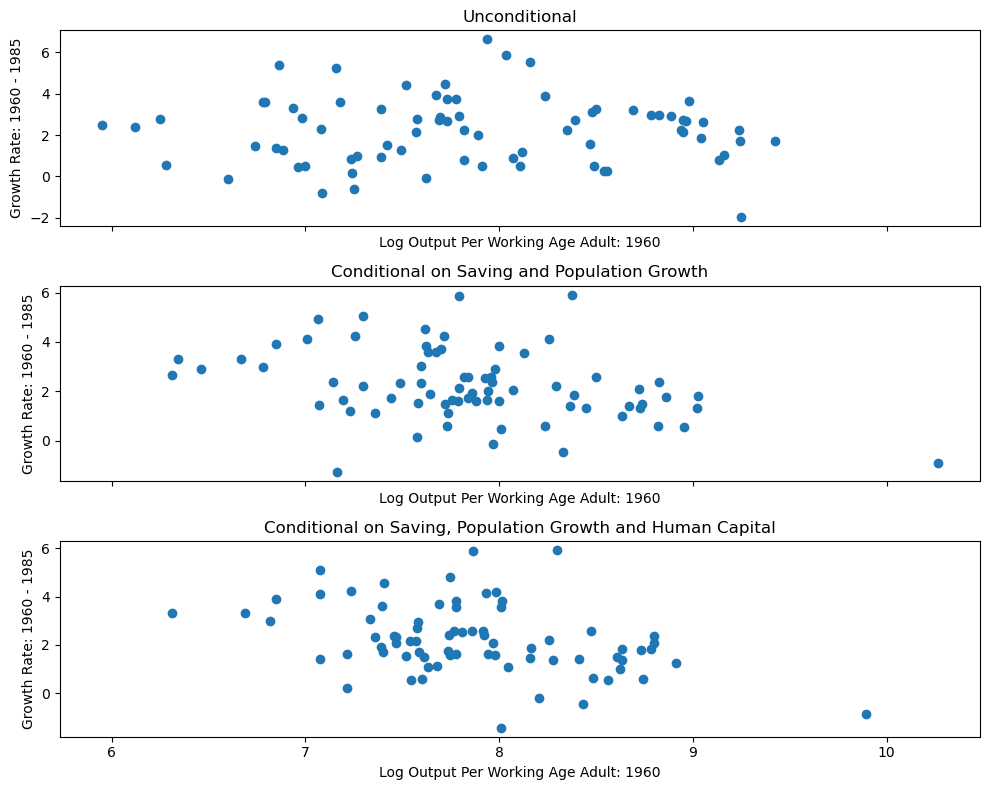

In [39]:
# Figure 1

def residuals(dependent, independent):
    model = sm.OLS(dependent, independent).fit()
    return model.resid

res_c = residuals(df2['log_Y60'], df2[['log_s', 'log_ngd']])
res_p2 = residuals(df2['log_diff'], df2[['log_s', 'log_ngd']])
res_h = residuals(df2['log_Y60'], df2[['log_s', 'log_ngd', 'log_school']])
res_p3 = residuals(df2['log_diff'], df2[['log_s', 'log_ngd', 'log_school']])

fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex='col')

# Plot 1
axs[0].scatter(df2['log_Y60'], (df2['log_diff']) * 100 / 25)
axs[0].set_xlabel('Log Output Per Working Age Adult: 1960')
axs[0].set_ylabel('Growth Rate: 1960 - 1985')
axs[0].set_title('Unconditional')

# Plot 2
axs[1].scatter(res_c + np.mean(df2['log_Y60']),
               (res_p2 + np.mean(df2['log_diff'])) * 100 / 25)
axs[1].set_xlabel('Log Output Per Working Age Adult: 1960')
axs[1].set_ylabel('Growth Rate: 1960 - 1985')
axs[1].set_title('Conditional on Saving and Population Growth')

# Plot 3
axs[2].scatter(res_h + np.mean(df2['log_Y60']),
               (res_p3 + np.mean(df2['log_diff'])) * 100 / 25)
axs[2].set_xlabel('Log Output Per Working Age Adult: 1960')
axs[2].set_ylabel('Growth Rate: 1960 - 1985')
axs[2].set_title('Conditional on Saving, Population Growth and Human Capital')

plt.tight_layout()
plt.show()